# **ESTIMATIVA POR MÍNIMO QUADRADO**

In [48]:
import numpy as np
import pandas as pd

### **Análise Inicial**

In [49]:
nota = pd.read_excel('data/concurso.xlsx')

In [50]:
nota.head(25)

,inicio_estudo,tempo_estudo_dia,nota
0,5,120,8.1
1,13,90,6.8
2,20,120,7.0
3,28,60,7.4
4,20,150,9.3
5,24,150,7.5
6,18,60,7.6
7,8,120,8.0
8,2,240,7.0
9,12,90,7.3


5.x + 120.y = 8.1

13.x + 90.y = 6.8

20.x + 120.y = 7

28.x + 60.y = 7.4

20.x + 150y = 9.3

....

In [51]:
nota.shape

(25, 3)

In [52]:
# Análise dos tipos de atributos.
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
nota.dtypes

inicio_estudo         int64
tempo_estudo_dia      int64
nota                float64
dtype: object

Valores Missing (NAN)

In [53]:
nota.isnull().sum()

inicio_estudo       0
tempo_estudo_dia    0
nota                0
dtype: int64

### **Criação da Matriz dos Coeficientes**

In [54]:
nota.head()

,inicio_estudo,tempo_estudo_dia,nota
0,5,120,8.1
1,13,90,6.8
2,20,120,7.0
3,28,60,7.4
4,20,150,9.3


In [55]:
A = nota.drop(columns=['nota'])
A.head()

,inicio_estudo,tempo_estudo_dia
0,5,120
1,13,90
2,20,120
3,28,60
4,20,150


In [56]:
A = A.values
print (A)

[[  5 120]
 [ 13  90]
 [ 20 120]
 [ 28  60]
 [ 20 150]
 [ 24 150]
 [ 18  60]
 [  8 120]
 [  2 240]
 [ 12  90]
 [ 15  90]
 [  9 120]
 [  6 180]
 [  4  90]
 [  8 150]
 [ 12 120]
 [ 10 180]
 [  3  90]
 [ 15 180]
 [  9  90]
 [ 24 120]
 [  5 150]
 [  7 120]
 [ 12 180]
 [  2  90]]


In [57]:
type(A)

numpy.ndarray

### **Criação da Matriz das Constantes**

In [58]:
nota.head()

,inicio_estudo,tempo_estudo_dia,nota
0,5,120,8.1
1,13,90,6.8
2,20,120,7.0
3,28,60,7.4
4,20,150,9.3


In [59]:
b = nota.drop(columns=['inicio_estudo','tempo_estudo_dia'])
b.head()

,nota
0,8.1
1,6.8
2,7.0
3,7.4
4,9.3


In [60]:
b = b.values
b

array([[8.1],
       [6.8],
       [7. ],
       [7.4],
       [9.3],
       [7.5],
       [7.6],
       [8. ],
       [7. ],
       [7.3],
       [8.6],
       [8.3],
       [7.9],
       [6.4],
       [7.8],
       [9.4],
       [8.8],
       [6.9],
       [7.7],
       [8.2],
       [8.6],
       [8.1],
       [7.2],
       [8.5],
       [6.1]])

### **Estimativa por mínimos quadrados**

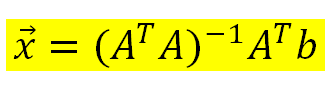

In [61]:
# Transposta da Matriz A
At = np.array(A).T
At

array([[  5,  13,  20,  28,  20,  24,  18,   8,   2,  12,  15,   9,   6,
          4,   8,  12,  10,   3,  15,   9,  24,   5,   7,  12,   2],
       [120,  90, 120,  60, 150, 150,  60, 120, 240,  90,  90, 120, 180,
         90, 150, 120, 180,  90, 180,  90, 120, 150, 120, 180,  90]],
      dtype=int64)

In [62]:
print(A)

[[  5 120]
 [ 13  90]
 [ 20 120]
 [ 28  60]
 [ 20 150]
 [ 24 150]
 [ 18  60]
 [  8 120]
 [  2 240]
 [ 12  90]
 [ 15  90]
 [  9 120]
 [  6 180]
 [  4  90]
 [  8 150]
 [ 12 120]
 [ 10 180]
 [  3  90]
 [ 15 180]
 [  9  90]
 [ 24 120]
 [  5 150]
 [  7 120]
 [ 12 180]
 [  2  90]]


In [63]:
# Multiplicação da Transposta de A pela matriz A
AtA =  np.dot(At,A) #Dot product of two arrays. Specifically,
AtA

array([[  4669,  34950],
       [ 34950, 441900]], dtype=int64)

In [64]:
# Inversa da matriz calculada anteriormente
inv = np.linalg.inv(AtA) #Compute the inverse of a matrix.
inv

array([[ 5.24991072e-04, -4.15216971e-05],
       [-4.15216971e-05,  5.54691857e-06]])

In [65]:
Atb = np.dot(At,b)
Atb

array([[ 2305.9],
       [24726. ]])

In [66]:
x = np.dot(inv,Atb)
x

array([[0.18391143],
       [0.04140823]])

In [67]:
x =  np.dot(np.dot(np.linalg.inv(np.dot(At,A)),At),b)
x

array([[0.18391143],
       [0.04140823]])

**nota = 0.1839.inicio_estudo + 0.0414.tempo_estudo_dia**

In [68]:
resultado = nota
resultado

,inicio_estudo,tempo_estudo_dia,nota
0,5,120,8.1
1,13,90,6.8
2,20,120,7.0
3,28,60,7.4
4,20,150,9.3
5,24,150,7.5
6,18,60,7.6
7,8,120,8.0
8,2,240,7.0
9,12,90,7.3


In [69]:
resultado['previsao'] = resultado['inicio_estudo']*x[0]+resultado['tempo_estudo_dia']*x[1]
resultado

,inicio_estudo,tempo_estudo_dia,nota,previsao
0,5,120,8.1,5.888544
1,13,90,6.8,6.117589
2,20,120,7.0,8.647216
3,28,60,7.4,7.634014
4,20,150,9.3,9.889463
5,24,150,7.5,10.625108
6,18,60,7.6,5.794899
7,8,120,8.0,6.440279
8,2,240,7.0,10.305797
9,12,90,7.3,5.933678


In [70]:
# Erro médio absoluto (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(resultado.nota, resultado.previsao)

1.582360299982678

In [71]:
resultado['erro_abs'] = abs (resultado.nota - resultado.previsao)
resultado

,inicio_estudo,tempo_estudo_dia,nota,previsao,erro_abs
0,5,120,8.1,5.888544,2.211456
1,13,90,6.8,6.117589,0.682411
2,20,120,7.0,8.647216,1.647216
3,28,60,7.4,7.634014,0.234014
4,20,150,9.3,9.889463,0.589463
5,24,150,7.5,10.625108,3.125108
6,18,60,7.6,5.794899,1.805101
7,8,120,8.0,6.440279,1.559721
8,2,240,7.0,10.305797,3.305797
9,12,90,7.3,5.933678,1.366322


# **Criação de um modelo de regressão linear múltipla**

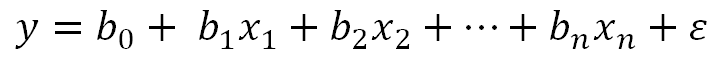

In [72]:
resultado.head()

,inicio_estudo,tempo_estudo_dia,nota,previsao,erro_abs
0,5,120,8.1,5.888544,2.211456
1,13,90,6.8,6.117589,0.682411
2,20,120,7.0,8.647216,1.647216
3,28,60,7.4,7.634014,0.234014
4,20,150,9.3,9.889463,0.589463


In [73]:
B = resultado.drop(columns=['nota','previsao','erro_abs'])
B.head()

,inicio_estudo,tempo_estudo_dia
0,5,120
1,13,90
2,20,120
3,28,60
4,20,150


In [74]:
B = B.assign(unidade=1)
B.head()

,inicio_estudo,tempo_estudo_dia,unidade
0,5,120,1
1,13,90,1
2,20,120,1
3,28,60,1
4,20,150,1


In [75]:
B = B[['unidade', 'inicio_estudo', 'tempo_estudo_dia']]
B.head()

,unidade,inicio_estudo,tempo_estudo_dia
0,1,5,120
1,1,13,90
2,1,20,120
3,1,28,60
4,1,20,150


In [76]:
Bt = np.array(B).T
Bt

array([[  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
       [  5,  13,  20,  28,  20,  24,  18,   8,   2,  12,  15,   9,   6,
          4,   8,  12,  10,   3,  15,   9,  24,   5,   7,  12,   2],
       [120,  90, 120,  60, 150, 150,  60, 120, 240,  90,  90, 120, 180,
         90, 150, 120, 180,  90, 180,  90, 120, 150, 120, 180,  90]],
      dtype=int64)

In [77]:
x2 =  np.dot(np.dot(np.linalg.inv(np.dot(Bt,B)),Bt),b)
x2

array([[6.48712882e+00],
       [4.13304622e-02],
       [6.44273496e-03]])

**nota = 6.4871 + 0.0413.inicio_estudo + 0.00644.tempo_estudo_dia**

In [78]:
resultado['previsao2'] = x2[0]+resultado['inicio_estudo']*x2[1]+resultado['tempo_estudo_dia']*x2[2]
resultado

,inicio_estudo,tempo_estudo_dia,nota,previsao,erro_abs,previsao2
0,5,120,8.1,5.888544,2.211456,7.466909
1,13,90,6.8,6.117589,0.682411,7.604271
2,20,120,7.0,8.647216,1.647216,8.086866
3,28,60,7.4,7.634014,0.234014,8.030946
4,20,150,9.3,9.889463,0.589463,8.280148
5,24,150,7.5,10.625108,3.125108,8.445470
6,18,60,7.6,5.794899,1.805101,7.617641
7,8,120,8.0,6.440279,1.559721,7.590901
8,2,240,7.0,10.305797,3.305797,8.116046
9,12,90,7.3,5.933678,1.366322,7.562941


In [79]:
# Erro médio absoluto (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(resultado.nota, resultado.previsao2)

0.6362742744691547

In [80]:
resultado['erro_abs2'] = abs (resultado.nota - resultado.previsao2)
resultado

,inicio_estudo,tempo_estudo_dia,nota,previsao,erro_abs,previsao2,erro_abs2
0,5,120,8.1,5.888544,2.211456,7.466909,0.633091
1,13,90,6.8,6.117589,0.682411,7.604271,0.804271
2,20,120,7.0,8.647216,1.647216,8.086866,1.086866
3,28,60,7.4,7.634014,0.234014,8.030946,0.630946
4,20,150,9.3,9.889463,0.589463,8.280148,1.019852
5,24,150,7.5,10.625108,3.125108,8.445470,0.945470
6,18,60,7.6,5.794899,1.805101,7.617641,0.017641
7,8,120,8.0,6.440279,1.559721,7.590901,0.409099
8,2,240,7.0,10.305797,3.305797,8.116046,1.116046
9,12,90,7.3,5.933678,1.366322,7.562941,0.262941


In [81]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [82]:
# Criação do modelo Usando a biblioteca Statsmodels
modelo = smf.ols('nota ~ inicio_estudo + tempo_estudo_dia', data = nota).fit()

In [83]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   nota   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     2.485
Date:                Wed, 12 Mar 2025   Prob (F-statistic):              0.106
Time:                        15:41:59   Log-Likelihood:                -28.151
No. Observations:                  25   AIC:                             62.30
Df Residuals:                      22   BIC:                             65.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.4871      0.624  

**nota = 6.4871 + 0.0413.inicio_estudo + 0.00644.tempo_estudo_dia**